<a href="https://colab.research.google.com/github/williamhamonangan/Olist_e-commerce/blob/main/Capstone_Project_Notebook_William_Hamonangan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT - Certified Data Analyst

## 1. Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Import Packages

In [ ]:
import os
import sqlite3
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind
# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = '/content/gdrive/MyDrive/Narasio Data/Meet 21 - Capstone Project CDA/dataset/'
os.listdir(path)

['Olist E-commerce.db',
 'Data Description.txt',
 'Orders.csv',
 'MAIN DATA OLYST NEW DELIVERED ONLY - Sheet1.csv',
 'data_olist_RFM.xlsx',
 'DATA_OLYST_CLEANSING.xls',
 'DATA_OLYST_CLEANSING.csv',
 'database_olist_new.csv']

## 3. Connect SQLite to Python

In [ ]:
# Kemudian kembali membuat connection ke database yang udah ada
conn = sqlite3.connect(path + 'Olist E-commerce.db')

# Membuat cursor object untuk memanggil SQL statement
cur = conn.cursor()

In [ ]:
cur.execute("""
              SELECT 
                  name 
              FROM sqlite_master 
              WHERE type='table'
            """)

print(cur.fetchall())

[('Orders',), ('Products',), ('Customers',), ('Sellers',), ('Geolocation',)]


In [ ]:
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM PRODUCTS
                  """, conn)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,72d3bf1d3a790f8874096fcf860e3eff,toys,57.0,341.0,2.0,583.0,20.0,21.0,20.0
1,60184212dae4e6b0da32bf54271a8c4a,watches_gifts,59.0,476.0,2.0,394.0,17.0,11.0,14.0
2,7564c1759c04fc0a38f2aa84f7a370ee,construction_tools_construction,59.0,2432.0,3.0,1200.0,16.0,11.0,11.0
3,a5a0e71a81ae65aa335e71c06261e260,housewares,57.0,698.0,3.0,705.0,34.0,22.0,28.0
4,69d980b4120a76616d7b237d731d6156,watches_gifts,60.0,1362.0,3.0,600.0,16.0,11.0,12.0
...,...,...,...,...,...,...,...,...,...
7018,526f833e1eb0a32ad9351145a761b9ab,watches_gifts,60.0,491.0,2.0,250.0,16.0,2.0,11.0
7019,9e10ae46a3021a02f1692448ef9fa1db,health_beauty,45.0,2231.0,3.0,175.0,21.0,3.0,15.0
7020,829002c1d5f40820ebbc6ecd4bcdf3ab,home_construction,59.0,664.0,1.0,5150.0,30.0,35.0,30.0
7021,9503faef00966962beacdb4916272305,construction_tools_construction,55.0,612.0,1.0,1900.0,35.0,30.0,25.0


In [ ]:
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM CUSTOMERS
                  """, conn)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3df704f53d3f1d4818840b34ec672a9f,04cf8185c71090d28baa4407b2e6d600,5271,sao paulo,SP
1,f5afca14dfa9dc64251cf2b45c54c363,38cad70d154a4dcc42b598d5c01f7ef1,25211,duque de caxias,RJ
2,be8c14c16a4d47194ccdfe10f1fc5b1a,c86a25b8f5f6c203bb3471553bdc3200,13157,cosmopolis,SP
3,388025bec8128ff20ec1a316ed4dcf02,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR
4,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180,portao,RS
...,...,...,...,...,...
10717,ce5efd1b1d8a2fa290a871edd5c26cd6,39fff7cb5873a7116b02234bd1e6c6dc,11320,sao vicente,SP
10718,a046c690e0564ffde0ce611b5eee2c30,4a7ce65ce092885c0af12dc0001457cf,35600,bom despacho,MG
10719,f00bb12620b7b232233cace1b229db18,cf82c9581d66ad1de6b0fe919188bdd6,36026,juiz de fora,MG
10720,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,78048,cuiaba,MT


In [ ]:
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM ORDERS LIMIT 10
                  """, conn)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,...,1.0,credit_card,1.0,54.36,8f39f09c22b1ceb6e3eb178d8e50bb8a,4.0,None,Gostei do produto,2018-03-13 00:00:00,2018-03-14 10:36:16
1,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,1.0,60184212dae4e6b0da32bf54271a8c4a,...,1.0,credit_card,10.0,386.33,ffa0d9ba2678dba5fa370295245f473d,4.0,None,"Inicialmente, pedi o cancelamento do pedido de...",2018-01-04 00:00:00,2018-01-04 18:29:06
2,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,1.0,7564c1759c04fc0a38f2aa84f7a370ee,...,1.0,boleto,1.0,55.02,b1dafcdfcddb6feb75222b9c1f2baad3,5.0,None,None,2018-06-19 00:00:00,2018-06-20 11:07:14
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49
4,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,2.0,a5a0e71a81ae65aa335e71c06261e260,...,1.0,boleto,1.0,267.80,fd793fea4f4a2ddcc956561144b6c04e,1.0,None,None,2017-05-11 00:00:00,2017-05-12 11:25:49
5,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-09 18:45:18,2017-08-10 20:21:53,2017-08-16 18:17:54,2017-08-31 00:00:00,1.0,69d980b4120a76616d7b237d731d6156,...,1.0,credit_card,1.0,7.08,7b66de927426b71a817aa36df5e8a0b3,1.0,None,Muito bom o produto e preço cobrado!,2017-08-17 00:00:00,2017-08-17 23:36:23
6,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,1.0,c3ba4e8d3cb30049213b682e751e9d00,...,1.0,boleto,1.0,201.82,914da4c2875eeb6dd3f1eba3539e73ca,4.0,None,None,2018-08-30 00:00:00,2018-09-03 18:26:07
7,a5474c0071dd5d1074e12d417078bbd0,ef15b3240b2083e0487762ee2978d2b8,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02 00:00:00,1.0,1f75be631e988bb0ad750e60e18d043b,...,1.0,boleto,1.0,21.38,ef45857b2a4924df76832d06cca3231d,5.0,Ótimo,Chegou antes do prazo e o produto é exatamente...,2018-08-04 00:00:00,2018-08-06 12:41:29
8,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,None,None,2018-08-21 00:00:00,1.0,1522589c64efd46731d3522568e5bc83,...,1.0,boleto,1.0,50.35,c4b17a374b71539eb360fe5baaa9a10e,3.0,bolo fake,"Gostei do produto, porem fiquei preocupada não...",2018-08-25 00:00:00,2018-08-29 10:48:52
9,01a75ac3dd000b7628a684be97c29234,57ee2ef64f17a5f9a4bf30489b06326c,delivered,2018-01-23 10:32:39,2018-01-23 10:59:10,2018-01-26 19:12:26,2018-02-07 14:59:03,2018-02-21 00:00:00,1.0,b5c114b11d53b6fd85a6a90790f0b479,...,1.0,credit_card,5.0,58.00,c3a9c486f5d88c848407644135b9c807,1.0,None,COMO VOU AVALIAR UM PRODUTO QUE NÃO RECEBI,2018-02-08 00:00:00,2018-02-08 21:13:41


In [ ]:
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM SELLERS
                  """, conn)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,8602a61d680a10a82cceeeda0d99ea3d,1001,sao paulo,SP
1,dd55f1bb788714a40e7954c3be6df745,1021,sao paulo,SP
2,e0487761face83d64fcada2408959a36,1021,sao paulo,SP
3,09bad886111255c5b5030314fc7f1a4a,1022,sao paulo,SP
4,f049a72cf58fd31b11f8919cade515e7,1023,sao paulo,SP
...,...,...,...,...
3090,4bde6149c15cf7e177b36fa060dd6de8,99500,carazinho,RS
3091,447d377bdb757058acb569025ee18a93,99500,carazinho,RS
3092,4fae87d32467e18eb46e4a76a0a0b9ce,99670,ronda alta,RS
3093,968ee78631915a63fef426d6733d7422,99700,erechim,RS


In [ ]:
pd.read_sql_query("""
                    SELECT 
                        *
                    FROM GEOLOCATION
                  """, conn)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1012,-23.540451,-46.643570
2,1014,-23.542521,-46.635335
3,1020,-23.544207,-46.636281
4,1021,-23.546718,-46.639357
...,...,...,...
7120,99830,-28.069978,-52.008408
7121,99870,-27.883745,-52.233311
7122,99925,-28.386970,-51.845810
7123,99950,-28.068869,-52.012942


## 4. Data Preparation Using SQL

In [ ]:
db = pd.read_sql_query("""
    SELECT * FROM (SELECT * FROM ORDERS LEFT JOIN PRODUCTS
    ON ORDERS.PRODUCT_ID = PRODUCTS.PRODUCT_ID ) DATA1
    LEFT JOIN CUSTOMERS ON CUSTOMERS.CUSTOMER_ID = DATA1.CUSTOMER_ID
    LEFT JOIN GEOLOCATION ON CUSTOMERS.CUSTOMER_ZIP_CODE_PREFIX = GEOLOCATION.GEOLOCATION_ZIP_CODE_PREFIX
""",conn)

In [ ]:
db.to_csv(path+'database_olist_new.csv', index=False)

In [ ]:
df=pd.read_csv(path+'database_olist_new.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       11000 non-null  object 
 1   customer_id                    11001 non-null  object 
 2   order_status                   11001 non-null  object 
 3   order_purchase_timestamp       11000 non-null  object 
 4   order_approved_at              10983 non-null  object 
 5   order_delivered_carrier_date   10802 non-null  object 
 6   order_delivered_customer_date  10685 non-null  object 
 7   order_estimated_delivery_date  11000 non-null  object 
 8   order_item_id                  10920 non-null  float64
 9   product_id                     10920 non-null  object 
 10  seller_id                      10920 non-null  object 
 11  shipping_limit_date            10920 non-null  object 
 12  price                          10920 non-null 

## 5. Problem Statement

1.   Olist masih belum menjangkau semua calon pelanggannya
2.   Mempertahankan pelanggan agar tetap membeli
3.   Optimalisasi transaksi untuk setiap wilayah



## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

Cleaning, Filter nilai status_order "Delivered"

In [ ]:
df = df[df['order_status'] == 'delivered']
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10684 entries, 0 to 11000
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10684 non-null  object 
 1   customer_id                    10684 non-null  object 
 2   order_status                   10684 non-null  object 
 3   order_purchase_timestamp       10684 non-null  object 
 4   order_approved_at              10683 non-null  object 
 5   order_delivered_carrier_date   10684 non-null  object 
 6   order_delivered_customer_date  10684 non-null  object 
 7   order_estimated_delivery_date  10684 non-null  object 
 8   order_item_id                  10684 non-null  float64
 9   product_id                     10684 non-null  object 
 10  seller_id                      10684 non-null  object 
 11  shipping_limit_date            10684 non-null  object 
 12  price                          10684 non-null 

Cek data duplicate pada kolom 'order_id'

In [ ]:
df[df["order_id"].duplicated(keep=False)].sort_values("order_id")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_id.1,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
2124,00526a9d4ebde463baee25f386963ddc,5848ef3f994e18c5121d291e0daedc81,delivered,2018-08-07 22:03:44,2018-08-07 22:15:22,2018-08-08 14:11:00,2018-08-16 19:58:24,2018-08-15 00:00:00,4.0,0c4a0f8ab44f9acd2d04e7024f9ba362,...,16.0,14.0,5848ef3f994e18c5121d291e0daedc81,7e59d854b9bb4cbb2c85fcd93877c694,8527.0,ferraz de vasconcelos,SP,8527.0,-23.946120,-46.286583
2123,00526a9d4ebde463baee25f386963ddc,5848ef3f994e18c5121d291e0daedc81,delivered,2018-08-07 22:03:44,2018-08-07 22:15:22,2018-08-08 14:11:00,2018-08-16 19:58:24,2018-08-15 00:00:00,3.0,0c4a0f8ab44f9acd2d04e7024f9ba362,...,16.0,14.0,5848ef3f994e18c5121d291e0daedc81,7e59d854b9bb4cbb2c85fcd93877c694,8527.0,ferraz de vasconcelos,SP,8527.0,-23.946120,-46.286583
5229,00c405bd71187154a7846862f585a9d4,1ab52508d3c58d96241850142347b75f,delivered,2017-10-23 14:59:46,2017-10-23 15:14:13,2017-10-25 13:30:02,2017-10-31 18:47:06,2017-11-17 00:00:00,1.0,c4cf7c2e1f190d51517eba7e8211c8e6,...,8.0,12.0,1ab52508d3c58d96241850142347b75f,58b051c30d684ac12a2049a49c856203,44065.0,feira de santana,BA,44065.0,-12.980332,-38.512532
5230,00c405bd71187154a7846862f585a9d4,1ab52508d3c58d96241850142347b75f,delivered,2017-10-23 14:59:46,2017-10-23 15:14:13,2017-10-25 13:30:02,2017-10-31 18:47:06,2017-11-17 00:00:00,1.0,c4cf7c2e1f190d51517eba7e8211c8e6,...,8.0,12.0,1ab52508d3c58d96241850142347b75f,58b051c30d684ac12a2049a49c856203,44065.0,feira de santana,BA,44065.0,-12.980332,-38.512532
2032,011bf86f1b7dacebda2c874333cf656b,e1238987433fd511c3a493ea3d3913b0,delivered,2018-03-09 19:44:33,2018-03-10 19:48:24,2018-03-14 01:38:34,2018-03-21 21:38:35,2018-04-05 00:00:00,2.0,9ecadb84c81da840dbf3564378b586e9,...,35.0,20.0,e1238987433fd511c3a493ea3d3913b0,3bb9fa30f4bbd9b9f1aac2be8d5928d7,88340.0,camboriu,SC,88340.0,-26.907300,-49.097851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,ff1f8f328e5a59ac754240b6dd31bcb4,ba53e87622e90e0a905d871c0c8d53af,delivered,2017-08-10 16:07:21,2017-08-10 16:25:17,2017-08-14 20:59:59,2017-08-19 14:17:43,2017-08-30 00:00:00,3.0,e7a6f33d382bca6fa19f52ff13e440bd,...,15.0,35.0,ba53e87622e90e0a905d871c0c8d53af,0cd33e5cc45d8be1415bf478ead300f5,11440.0,guaruja,SP,11440.0,-23.203165,-46.871240
2743,ff1f8f328e5a59ac754240b6dd31bcb4,ba53e87622e90e0a905d871c0c8d53af,delivered,2017-08-10 16:07:21,2017-08-10 16:25:17,2017-08-14 20:59:59,2017-08-19 14:17:43,2017-08-30 00:00:00,1.0,e7a6f33d382bca6fa19f52ff13e440bd,...,15.0,35.0,ba53e87622e90e0a905d871c0c8d53af,0cd33e5cc45d8be1415bf478ead300f5,11440.0,guaruja,SP,11440.0,-23.203165,-46.871240
3398,ff978de32e717acd3b5abe1fb069d2b6,82808ea6794ed5643bd23f65508aed70,delivered,2017-12-12 09:50:42,2017-12-12 09:57:24,2017-12-12 19:21:50,2018-01-15 21:12:27,2018-01-31 00:00:00,1.0,0829c25b4a3efca7651f07cd4b8e05bc,...,4.0,14.0,82808ea6794ed5643bd23f65508aed70,7e1ca53dbea2514cb38bb0de60e8f16b,69007.0,manaus,AM,69007.0,-3.054735,-60.026162
3396,ff978de32e717acd3b5abe1fb069d2b6,82808ea6794ed5643bd23f65508aed70,delivered,2017-12-12 09:50:42,2017-12-12 09:57:24,2017-12-12 19:21:50,2018-01-15 21:12:27,2018-01-31 00:00:00,1.0,0829c25b4a3efca7651f07cd4b8e05bc,...,4.0,14.0,82808ea6794ed5643bd23f65508aed70,7e1ca53dbea2514cb38bb0de60e8f16b,69007.0,manaus,AM,69007.0,-3.054735,-60.026162



Menghilangkan duplicate value pada kolom 'order_id' 

In [ ]:
df = df.drop_duplicates(subset=['order_id']).reset_index(drop=True)

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_id.1,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,...,21.0,20.0,3df704f53d3f1d4818840b34ec672a9f,04cf8185c71090d28baa4407b2e6d600,5271.0,sao paulo,SP,5271.0,-23.638546,-46.793101
1,641fb0752bf5b5940c376b3a8bb9dc52,f5afca14dfa9dc64251cf2b45c54c363,delivered,2017-12-15 00:06:10,2017-12-15 00:14:55,2017-12-19 01:58:00,2018-01-03 15:09:32,2018-01-16 00:00:00,1.0,60184212dae4e6b0da32bf54271a8c4a,...,11.0,14.0,f5afca14dfa9dc64251cf2b45c54c363,38cad70d154a4dcc42b598d5c01f7ef1,25211.0,duque de caxias,RJ,25211.0,-22.621216,-43.718599
2,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,1.0,7564c1759c04fc0a38f2aa84f7a370ee,...,11.0,11.0,be8c14c16a4d47194ccdfe10f1fc5b1a,c86a25b8f5f6c203bb3471553bdc3200,13157.0,cosmopolis,SP,13157.0,-20.588181,-47.372260
3,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1.0,a5a0e71a81ae65aa335e71c06261e260,...,22.0,28.0,388025bec8128ff20ec1a316ed4dcf02,f9effeed3df9ae063a58c0759b96f8b2,85804.0,cascavel,PR,85804.0,-23.269634,-51.043434
4,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-09 18:45:18,2017-08-10 20:21:53,2017-08-16 18:17:54,2017-08-31 00:00:00,1.0,69d980b4120a76616d7b237d731d6156,...,11.0,12.0,05e996469a2bf9559c7122b87e156724,5229b8e4d7d2b9b676c2083c17b1ecd0,93180.0,portao,RS,93180.0,-29.184555,-51.201284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24 00:00:00,1.0,9e10ae46a3021a02f1692448ef9fa1db,...,3.0,15.0,ce5efd1b1d8a2fa290a871edd5c26cd6,39fff7cb5873a7116b02234bd1e6c6dc,11320.0,sao vicente,SP,11320.0,-22.818898,-47.273997
10412,dfc6eb45a2753ed9e6c6ef4987b44503,a046c690e0564ffde0ce611b5eee2c30,delivered,2018-05-25 17:05:17,2018-05-25 17:15:21,2018-05-29 13:31:00,2018-06-04 23:54:32,2018-06-26 00:00:00,1.0,829002c1d5f40820ebbc6ecd4bcdf3ab,...,35.0,30.0,a046c690e0564ffde0ce611b5eee2c30,4a7ce65ce092885c0af12dc0001457cf,35600.0,bom despacho,MG,35600.0,-19.442289,-44.252938
10413,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,delivered,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08 00:00:00,1.0,9503faef00966962beacdb4916272305,...,30.0,25.0,f00bb12620b7b232233cace1b229db18,cf82c9581d66ad1de6b0fe919188bdd6,36026.0,juiz de fora,MG,36026.0,-19.963264,-43.412382
10414,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00,2.0,49d2e2460386273b195e7e59b43587c3,...,15.0,26.0,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,78048.0,cuiaba,MT,78048.0,-20.559936,-54.624648


In [ ]:
df[df["order_id"].duplicated(keep=False)].sort_values("order_id")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_id.1,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng


Cek dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10416 non-null  object 
 1   customer_id                    10416 non-null  object 
 2   order_status                   10416 non-null  object 
 3   order_purchase_timestamp       10416 non-null  object 
 4   order_approved_at              10415 non-null  object 
 5   order_delivered_carrier_date   10416 non-null  object 
 6   order_delivered_customer_date  10416 non-null  object 
 7   order_estimated_delivery_date  10416 non-null  object 
 8   order_item_id                  10416 non-null  float64
 9   product_id                     10416 non-null  object 
 10  seller_id                      10416 non-null  object 
 11  shipping_limit_date            10416 non-null  object 
 12  price                          10416 non-null 

Cek Nilai Null

In [ ]:
pd.isnull(df).sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   1
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_id                           0
review_score                        0
review_comment_title             9186
review_comment_message           6035
review_creation_date                1
review_answer_timestamp             1
product_id:1                        0
product_category_name             160
product_name

Menghapus Nilai Null

In [ ]:
df = df.dropna(subset=['order_approved_at'])
df = df.dropna(subset=['payment_sequential'])
df = df.dropna(subset=['payment_type'])
df = df.dropna(subset=['payment_installments'])
df = df.dropna(subset=['payment_value'])
df = df.dropna(subset=['product_category_name'])
df = df.dropna(subset=['product_name_lenght'])
df = df.dropna(subset=['product_description_lenght'])
df = df.dropna(subset=['product_photos_qty'])
df = df.dropna(subset=['product_weight_g'])
df = df.dropna(subset=['product_length_cm'])
df = df.dropna(subset=['product_height_cm'])
df = df.dropna(subset=['product_width_cm'])

Menghilangkan kolom pada data yang akan dianalisis

In [ ]:
df = df.drop(['review_comment_title'], axis=1)
df = df.drop(['review_comment_message'], axis=1)
df = df.drop(['review_creation_date'], axis=1)
df = df.drop(['review_answer_timestamp'], axis=1)
df = df.drop(['product_id:1'], axis=1)
df = df.drop(['customer_id.1'], axis=1)

In [ ]:
pd.isnull(df).sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10253 entries, 0 to 10415
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10253 non-null  object 
 1   customer_id                    10253 non-null  object 
 2   order_status                   10253 non-null  object 
 3   order_purchase_timestamp       10253 non-null  object 
 4   order_approved_at              10253 non-null  object 
 5   order_delivered_carrier_date   10253 non-null  object 
 6   order_delivered_customer_date  10253 non-null  object 
 7   order_estimated_delivery_date  10253 non-null  object 
 8   order_item_id                  10253 non-null  float64
 9   product_id                     10253 non-null  object 
 10  seller_id                      10253 non-null  object 
 11  shipping_limit_date            10253 non-null  object 
 12  price                          10253 non-null 

Cek Outlier pada kolom 'payment_value' dengan IQR

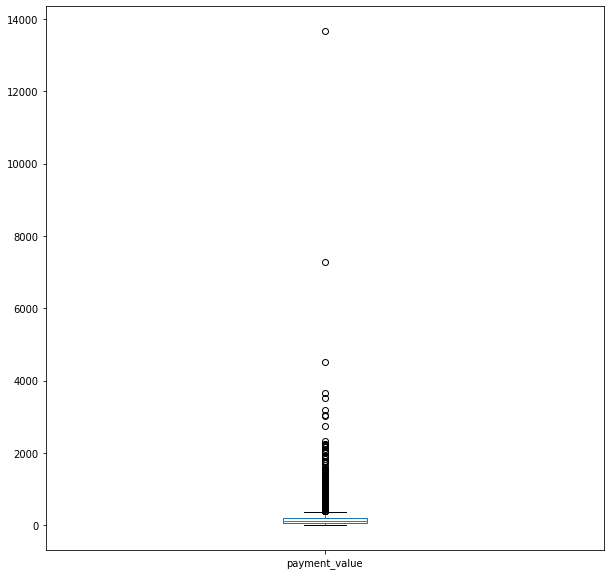

In [ ]:
df.boxplot(column='payment_value', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
p_q1 = df['payment_value'].quantile(0.25)
p_q3 = df['payment_value'].quantile(0.75)
p_iqr = p_q3 - p_q1
boxplot_p_min = p_q1 - 1.5 * p_iqr
boxplot_p_max = p_q3 + 1.5 * p_iqr
print('pv_Q1 :', p_q1)
print('pv_Q3 :', p_q3)
print('pv_IQR :', p_iqr)
print('pv_Min :', boxplot_p_min)
print('pv_Max :', boxplot_p_max)

pv_Q1 : 60.69
pv_Q3 : 187.98
pv_IQR : 127.28999999999999
pv_Min : -130.245
pv_Max : 378.91499999999996


In [ ]:
outliers = []
for i in df['payment_value']: 
        if (i<boxplot_p_min or i>boxplot_p_max):
            outliers.append(i)
print("Outliers from IQR method: ", sorted(outliers))

Outliers from IQR method:  [379.2, 379.73, 379.99, 380.12, 380.75, 381.0, 381.22, 381.28, 381.32, 381.88, 381.88, 381.88, 382.0, 382.14, 382.28, 382.79, 382.92, 382.92, 383.3, 383.98, 383.99, 384.04, 384.27, 384.5, 384.66, 384.86, 385.52, 385.57, 385.61, 385.63, 385.67, 385.68, 385.74, 386.24, 386.33, 386.6, 387.27, 387.27, 387.37, 387.41, 387.5, 387.57, 387.85, 387.85, 388.17, 389.16, 389.7, 389.82, 390.32, 391.45, 391.66, 391.87, 392.02, 392.56, 392.72, 392.89, 393.07, 393.08, 393.09, 393.47, 394.38, 394.42, 394.54, 394.64, 396.1, 397.02, 397.04, 397.46, 398.06, 398.42, 398.62, 399.95, 400.0, 400.36, 400.44, 400.44, 400.65, 402.49, 402.56, 403.24, 403.27, 403.8, 404.06, 404.28, 404.28, 404.88, 405.03, 405.03, 405.36, 405.47, 405.65, 405.69, 406.74, 407.04, 407.48, 408.09, 408.56, 408.69, 408.86, 409.54, 409.61, 410.1, 410.13, 410.95, 411.63, 412.4, 412.59, 413.04, 413.47, 413.58, 413.59, 413.72, 413.77, 413.82, 413.96, 413.97, 414.0, 414.08, 415.34, 415.54, 417.45, 417.76, 418.04, 41

In [ ]:
len(outliers)

799

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10253 entries, 0 to 10415
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       10253 non-null  object 
 1   customer_id                    10253 non-null  object 
 2   order_status                   10253 non-null  object 
 3   order_purchase_timestamp       10253 non-null  object 
 4   order_approved_at              10253 non-null  object 
 5   order_delivered_carrier_date   10253 non-null  object 
 6   order_delivered_customer_date  10253 non-null  object 
 7   order_estimated_delivery_date  10253 non-null  object 
 8   order_item_id                  10253 non-null  float64
 9   product_id                     10253 non-null  object 
 10  seller_id                      10253 non-null  object 
 11  shipping_limit_date            10253 non-null  object 
 12  price                          10253 non-null 

Delete Outliers dari data 'payment_value' 

In [ ]:
df = df[(df['payment_value'] >= boxplot_p_min) & (df['payment_value'] < boxplot_p_max)].reset_index(drop=True)

In [ ]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,1.0,72d3bf1d3a790f8874096fcf860e3eff,...,20.0,21.0,20.0,04cf8185c71090d28baa4407b2e6d600,5271.0,sao paulo,SP,5271.0,-23.638546,-46.793101
1,b52cc4919de82b4d696a4380d10804a3,be8c14c16a4d47194ccdfe10f1fc5b1a,delivered,2018-06-13 13:47:39,2018-06-15 02:37:29,2018-06-15 14:22:00,2018-06-18 22:32:44,2018-06-26 00:00:00,1.0,7564c1759c04fc0a38f2aa84f7a370ee,...,16.0,11.0,11.0,c86a25b8f5f6c203bb3471553bdc3200,13157.0,cosmopolis,SP,13157.0,-20.588181,-47.372260
2,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12 00:00:00,1.0,a5a0e71a81ae65aa335e71c06261e260,...,34.0,22.0,28.0,f9effeed3df9ae063a58c0759b96f8b2,85804.0,cascavel,PR,85804.0,-23.269634,-51.043434
3,634e8f4c0f6744a626f77f39770ac6aa,05e996469a2bf9559c7122b87e156724,delivered,2017-08-09 18:32:47,2017-08-09 18:45:18,2017-08-10 20:21:53,2017-08-16 18:17:54,2017-08-31 00:00:00,1.0,69d980b4120a76616d7b237d731d6156,...,16.0,11.0,12.0,5229b8e4d7d2b9b676c2083c17b1ecd0,93180.0,portao,RS,93180.0,-29.184555,-51.201284
4,6d25592267349b322799e2beb687871e,5bb39c890c91b1d26801aa19a9336eac,delivered,2018-08-26 22:04:34,2018-08-28 04:10:18,2018-08-28 12:56:00,2018-08-29 12:40:53,2018-08-30 00:00:00,1.0,c3ba4e8d3cb30049213b682e751e9d00,...,16.0,2.0,20.0,a71cac9f356cfeb9db35061020806212,2407.0,sao paulo,SP,2407.0,-23.463145,-46.656447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9449,4146f35ac7a7ef4e39fe344e563c1e3b,e0eac226ceae49858de89e8a5c1ba1ec,delivered,2017-11-26 19:42:22,2017-11-26 19:53:48,2017-11-27 18:33:24,2017-12-05 18:38:40,2017-12-15 00:00:00,1.0,526f833e1eb0a32ad9351145a761b9ab,...,16.0,2.0,11.0,7d414b6a1cf56a6bc5035f9eb436b15d,13490.0,cordeiropolis,SP,13490.0,-21.265830,-48.485112
9450,1b4a0e6b19d0034b531655b41ea89623,ce5efd1b1d8a2fa290a871edd5c26cd6,delivered,2017-10-02 08:45:35,2017-10-02 08:56:53,2017-10-03 20:26:19,2017-10-06 16:58:25,2017-10-24 00:00:00,1.0,9e10ae46a3021a02f1692448ef9fa1db,...,21.0,3.0,15.0,39fff7cb5873a7116b02234bd1e6c6dc,11320.0,sao vicente,SP,11320.0,-22.818898,-47.273997
9451,dfc6eb45a2753ed9e6c6ef4987b44503,a046c690e0564ffde0ce611b5eee2c30,delivered,2018-05-25 17:05:17,2018-05-25 17:15:21,2018-05-29 13:31:00,2018-06-04 23:54:32,2018-06-26 00:00:00,1.0,829002c1d5f40820ebbc6ecd4bcdf3ab,...,30.0,35.0,30.0,4a7ce65ce092885c0af12dc0001457cf,35600.0,bom despacho,MG,35600.0,-19.442289,-44.252938
9452,6ec4642f9993cc34f826cfb9068e5a2f,f00bb12620b7b232233cace1b229db18,delivered,2017-11-21 20:18:03,2017-11-21 20:28:52,2017-11-27 17:18:52,2017-12-02 16:48:46,2017-12-08 00:00:00,1.0,9503faef00966962beacdb4916272305,...,35.0,30.0,25.0,cf82c9581d66ad1de6b0fe919188bdd6,36026.0,juiz de fora,MG,36026.0,-19.963264,-43.412382


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9454 entries, 0 to 9453
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       9454 non-null   object 
 1   customer_id                    9454 non-null   object 
 2   order_status                   9454 non-null   object 
 3   order_purchase_timestamp       9454 non-null   object 
 4   order_approved_at              9454 non-null   object 
 5   order_delivered_carrier_date   9454 non-null   object 
 6   order_delivered_customer_date  9454 non-null   object 
 7   order_estimated_delivery_date  9454 non-null   object 
 8   order_item_id                  9454 non-null   float64
 9   product_id                     9454 non-null   object 
 10  seller_id                      9454 non-null   object 
 11  shipping_limit_date            9454 non-null   object 
 12  price                          9454 non-null   f

In [ ]:
df['payment_value']

0        54.36
1        55.02
2       267.80
3         7.08
4       201.82
         ...  
9449    141.40
9450     49.75
9451    173.63
9452    319.25
9453     42.42
Name: payment_value, Length: 9454, dtype: float64

In [ ]:
len(df)

9454

Boxplot nilai 'payment_value' setelah Outliers dihapus

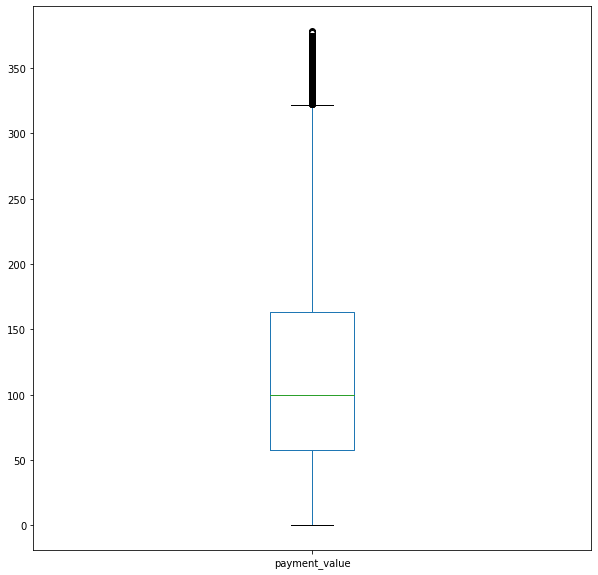

In [ ]:
df.boxplot(column='payment_value', fontsize=10, rot=0, grid=False, figsize=(10,10))

Mendeteksi outliers data 'price'

Boxplot nilai 'price' sebelum outlier dihapus

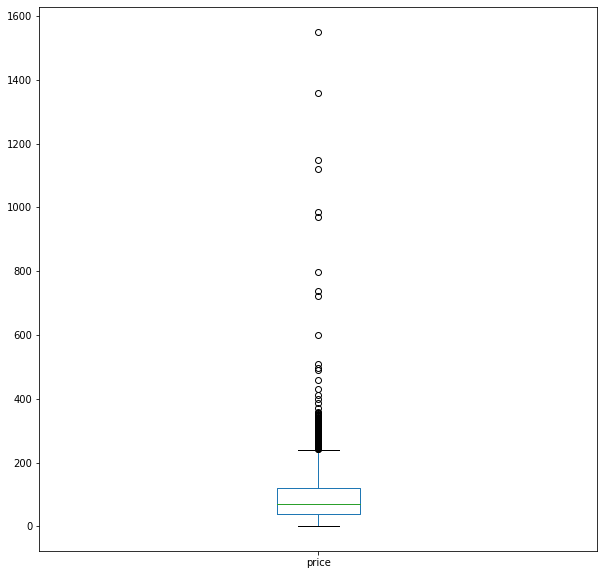

In [ ]:
df.boxplot(column='price', fontsize=10, rot=0, grid=False, figsize=(10,10))

Mencari nilai Interquartil dari data 'price'

In [ ]:
pr_q1 = df['price'].quantile(0.25)
pr_q3 = df['price'].quantile(0.75)
pr_iqr = pr_q3 - pr_q1
boxplot_pr_min = pr_q1 - 1.5 * pr_iqr
boxplot_pr_max = pr_q3 + 1.5 * pr_iqr
print('pr_Q1 :', pr_q1)
print('pr_Q3 :', pr_q3)
print('pr_IQR :', pr_iqr)
print('pr_Min :', boxplot_pr_min)
print('pr_Max :', boxplot_pr_max)

pr_Q1 : 38.4
pr_Q3 : 119.8
pr_IQR : 81.4
pr_Min : -83.70000000000002
pr_Max : 241.9


In [ ]:
len(df)

9454

In [ ]:
price_outliers = []
for i in df['price']: 
        if (i<boxplot_pr_min or i>boxplot_pr_max):
            price_outliers.append(i)
print("Price Outliers from IQR method: ", sorted(price_outliers))

Price Outliers from IQR method:  [244.0, 244.0, 244.99, 245.0, 245.9, 245.99, 246.62, 246.62, 246.97, 247.99, 248.0, 248.0, 248.99, 248.99, 249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249.0, 249.7, 249.8, 249.8, 249.89, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.9, 249.99, 249.99, 249.99, 249.99, 249.99, 249.99, 249.99, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 252.0, 252.0, 252.0, 254.0, 254.0, 254.0, 255.0, 255.0, 255.0, 255.0, 255.61, 256.78, 258.0, 259.0, 259.0, 259.0, 259.0, 259.0, 259.0, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.9, 259.99, 259.99, 260.0, 262.5, 263.92, 264.5, 265.0, 265.0, 265.0, 265.0, 265.0, 265.0, 267.0, 267.0, 268.38, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.0, 269.45, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.9, 269.99, 269.99, 269.99, 269.99, 269.99, 269.99, 270.0, 270.0,

In [ ]:
len(price_outliers)

401

Menghapus Outliers data 'price'

In [ ]:
df = df[(df['price'] >= boxplot_pr_min) & (df['price'] < boxplot_pr_max)].reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053 entries, 0 to 9052
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       9053 non-null   object 
 1   customer_id                    9053 non-null   object 
 2   order_status                   9053 non-null   object 
 3   order_purchase_timestamp       9053 non-null   object 
 4   order_approved_at              9053 non-null   object 
 5   order_delivered_carrier_date   9053 non-null   object 
 6   order_delivered_customer_date  9053 non-null   object 
 7   order_estimated_delivery_date  9053 non-null   object 
 8   order_item_id                  9053 non-null   float64
 9   product_id                     9053 non-null   object 
 10  seller_id                      9053 non-null   object 
 11  shipping_limit_date            9053 non-null   object 
 12  price                          9053 non-null   f

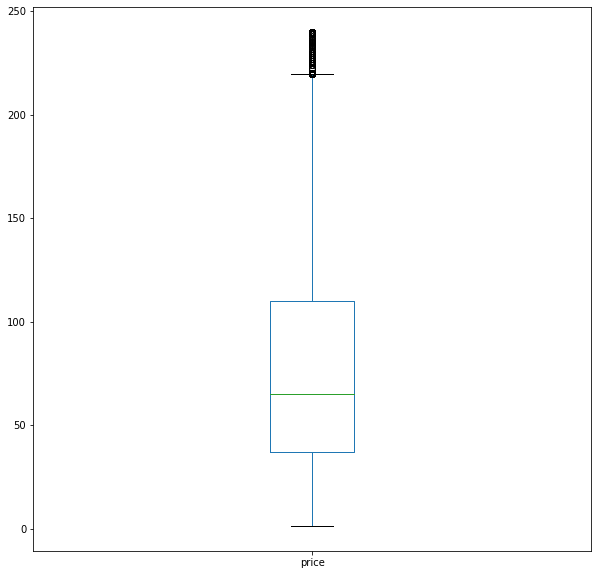

In [ ]:
df.boxplot(column='price', fontsize=10, rot=0, grid=False, figsize=(10,10))

Mendeteksi Outliers pada Data 'Freight_value'

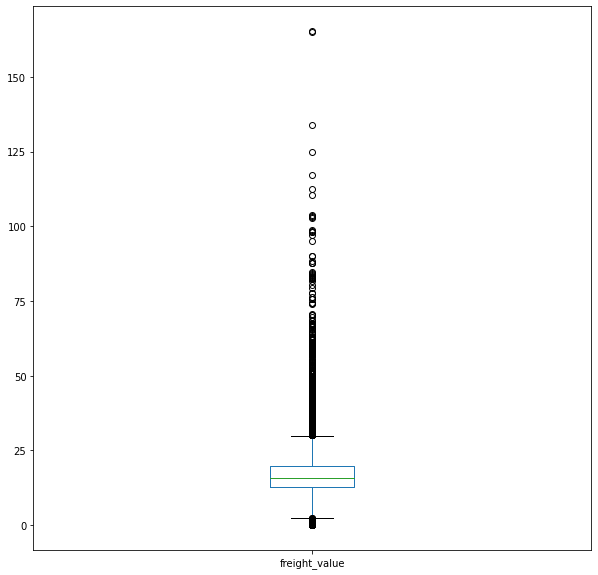

In [ ]:
df.boxplot(column='freight_value', fontsize=10, rot=0, grid=False, figsize=(10,10))

Mencari nilai Interquartil Freigh_value

In [ ]:
fr_q1 = df['freight_value'].quantile(0.25)
fr_q3 = df['freight_value'].quantile(0.75)
fr_iqr = fr_q3 - fr_q1
boxplot_fr_min = fr_q1 - 1.5 * fr_iqr
boxplot_fr_max = fr_q3 + 1.5 * fr_iqr
print('fr_Q1 :', fr_q1)
print('fr_Q3 :', fr_q3)
print('fr_IQR :', fr_iqr)
print('fr_Min :', boxplot_fr_min)
print('fr_Max :', boxplot_fr_max)

fr_Q1 : 12.79
fr_Q3 : 19.66
fr_IQR : 6.870000000000001
fr_Min : 2.4849999999999977
fr_Max : 29.965000000000003


Mendapatkan nilai outlier freight value

In [ ]:
freight_outliers = []
for i in df['freight_value']: 
        if (i<boxplot_fr_min or i>boxplot_fr_max):
            freight_outliers.append(i)
print("Freight_value Outliers from IQR method: ", sorted(freight_outliers))

Freight_value Outliers from IQR method:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.04, 0.06, 0.1, 0.25, 0.61, 0.69, 0.92, 0.97, 0.97, 0.98, 1.18, 1.28, 1.32, 1.46, 1.69, 1.8, 1.89, 1.98, 1.98, 2.17, 2.45, 2.46, 30.01, 30.04, 30.08, 30.09, 30.11, 30.11, 30.11, 30.14, 30.15, 30.21, 30.27, 30.3, 30.3, 30.4, 30.42, 30.5, 30.62, 30.66, 30.67, 30.7, 30.75, 30.77, 30.82, 30.85, 30.85, 30.96, 31.0, 31.02, 31.1, 31.1, 31.14, 31.2, 31.21, 31.23, 31.23, 31.36, 31.43, 31.45, 31.56, 31.57, 31.58, 31.68, 31.68, 31.7, 31.73, 31.76, 31.8, 31.8, 31.81, 31.84, 31.85, 31.91, 31.92, 31.93, 31.94, 31.94, 31.95, 31.96, 31.99, 32.01, 32.01, 32.03, 32.06, 32.07, 32.08, 32.09, 32.12, 32.15, 32.33, 32.51, 32.63, 32.71, 32.76, 32.76, 32.77, 32.83, 32.84, 32.84, 32.85, 32.88, 32.98, 32.98, 33.03, 33.08, 33.08, 33.08, 33.11, 33.15, 33.17, 33.19, 33.2

In [ ]:
len(freight_outliers)

816

Menghapus Outliers dari nilai 'Freight_value'

In [ ]:
df = df[(df['freight_value'] >= boxplot_fr_min) & (df['freight_value'] < boxplot_fr_max)].reset_index(drop=True)

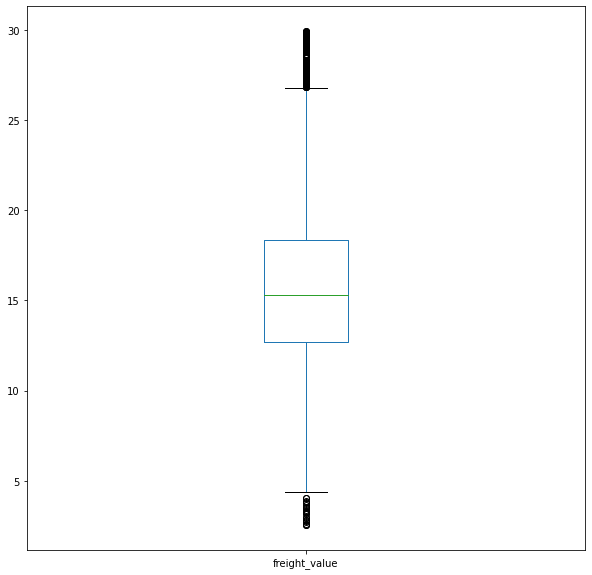

In [ ]:
df.boxplot(column='freight_value', fontsize=10, rot=0, grid=False, figsize=(10,10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       8237 non-null   object 
 1   customer_id                    8237 non-null   object 
 2   order_status                   8237 non-null   object 
 3   order_purchase_timestamp       8237 non-null   object 
 4   order_approved_at              8237 non-null   object 
 5   order_delivered_carrier_date   8237 non-null   object 
 6   order_delivered_customer_date  8237 non-null   object 
 7   order_estimated_delivery_date  8237 non-null   object 
 8   order_item_id                  8237 non-null   float64
 9   product_id                     8237 non-null   object 
 10  seller_id                      8237 non-null   object 
 11  shipping_limit_date            8237 non-null   object 
 12  price                          8237 non-null   f

Menghapus nilai 0 pada kolom 'Product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'

In [ ]:
df = df[df.product_photos_qty !=0].reset_index(drop=True)
df = df[df.product_weight_g !=0].reset_index(drop=True)
df = df[df.product_length_cm !=0].reset_index(drop=True)
df = df[df.product_height_cm !=0].reset_index(drop=True)
df = df[df.product_width_cm !=0].reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       8237 non-null   object 
 1   customer_id                    8237 non-null   object 
 2   order_status                   8237 non-null   object 
 3   order_purchase_timestamp       8237 non-null   object 
 4   order_approved_at              8237 non-null   object 
 5   order_delivered_carrier_date   8237 non-null   object 
 6   order_delivered_customer_date  8237 non-null   object 
 7   order_estimated_delivery_date  8237 non-null   object 
 8   order_item_id                  8237 non-null   float64
 9   product_id                     8237 non-null   object 
 10  seller_id                      8237 non-null   object 
 11  shipping_limit_date            8237 non-null   object 
 12  price                          8237 non-null   f

In [ ]:
df[df["customer_unique_id"].duplicated(keep=False)].sort_values("customer_unique_id")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
4853,7f9bdca299c6f4c8f906bf2d9df27ae0,3a548818d8a92c6e2fe22eca6596148c,delivered,2017-10-27 04:55:38,2017-10-28 03:05:58,2017-10-31 21:08:29,2017-11-08 22:06:44,2017-11-16 00:00:00,1.0,f027a7f215ea97926c427c5b0b313f9d,...,30.0,10.0,20.0,0c10e674d1504f959a7f2e504148c296,14094.0,ribeirao preto,SP,14094.0,-21.671256,-51.076639
7793,1fb395f38b15b8e1e14824c7d95e9a92,28dab86921b55fb87d1f0e9db5c14b2c,delivered,2018-04-25 14:29:47,2018-04-25 14:51:31,2018-04-26 10:04:00,2018-04-30 20:22:32,2018-05-15 00:00:00,1.0,18d87751433e4198e697c51bbbb66003,...,17.0,6.0,20.0,0c10e674d1504f959a7f2e504148c296,14094.0,ribeirao preto,SP,14094.0,-21.671256,-51.076639
541,759fc48b9360c6710317b337b9e8a974,539758b1f5c9ed62617d6e9cc64c4bc3,delivered,2018-04-13 16:18:11,2018-04-13 16:35:34,2018-04-16 23:16:39,2018-04-18 15:02:57,2018-05-02 00:00:00,1.0,b0c657fb8995510c4729dcb9739226c8,...,20.0,20.0,20.0,1772d62f5099be6942fbb3d3e881cc7c,18045.0,sorocaba,SP,18045.0,-22.815276,-43.319172
2423,a8e71f90cc64f1bb855f48a020bb463a,f3e417e7a48199977a2c9b58b7cf09bf,delivered,2018-04-26 19:25:22,2018-04-26 19:35:22,2018-04-27 12:32:00,2018-04-30 21:38:45,2018-05-09 00:00:00,1.0,72d9d9e20be430ad3b1ba561bb0cf71a,...,25.0,19.0,20.0,1772d62f5099be6942fbb3d3e881cc7c,18045.0,sorocaba,SP,18045.0,-22.815276,-43.319172
236,9c54a1816e487456bb7eb5082b9823ff,1d48a5dcde374b9d63b2c29e6af97cb8,delivered,2017-01-17 14:23:54,2017-01-17 14:30:16,2017-01-18 08:27:58,2017-02-08 08:43:59,2017-03-02 00:00:00,1.0,985c412b0ac92ed9d8a76bbeab6d44eb,...,34.0,6.0,28.0,1d2435aa3b858d45c707c9fc25e18779,21760.0,rio de janeiro,RJ,21760.0,-22.951805,-43.646747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,7599f0394aa4e7aea57ca87897378014,b3d94a7947f1b122459d6494760708e8,delivered,2017-07-20 13:34:43,2017-07-20 13:45:16,2017-07-22 14:14:45,2017-07-25 19:33:08,2017-08-04 00:00:00,1.0,f1c7f353075ce59d8a6f3cf58f419c9c,...,35.0,12.0,30.0,f0ac405c280fab1d087b8982e7801b54,13015.0,campinas,SP,13015.0,-22.703786,-46.772953
5164,adc2f0c9fd838d820339f8220c1adf08,d16ddf649debf65863ac0f1738584de9,delivered,2018-06-24 10:09:52,2018-06-24 10:37:19,2018-06-28 15:41:00,2018-07-02 17:12:52,2018-07-20 00:00:00,1.0,0152f69b6cf919bcdaf117aa8c43e5a2,...,40.0,4.0,30.0,fb920961e4d8e55fd9c357976a611765,11730.0,mongagua,SP,11730.0,-22.829946,-47.594553
8197,d591a97fad2791ee9d973b748fd1c4d9,49c66275a0b693c4414d9b1cc41477c2,delivered,2017-03-25 15:34:23,2017-03-25 15:45:21,2017-04-04 07:30:36,2017-04-10 11:26:36,2017-05-02 00:00:00,1.0,b09790edda54333116f9cf1decc580a1,...,40.0,4.0,30.0,fb920961e4d8e55fd9c357976a611765,11730.0,mongagua,SP,11730.0,-22.829946,-47.594553
4579,851c72a772c3703bd071ae71f797edb4,1197bf329f121b056ea797341fd5544a,delivered,2018-03-27 18:26:09,2018-03-27 18:35:19,2018-03-29 20:04:58,2018-04-02 18:18:40,2018-04-09 00:00:00,1.0,cb52e6775d816cbdadade36948e81fc8,...,40.0,34.0,44.0,fcceb56470bf0b4d59caa87e111ca69e,13417.0,piracicaba,SP,13417.0,-20.415451,-49.972068


Mengubah format data tanggal ke datetime

In [ ]:
#df['order_delivered_carrier_date'] = df['order_delivered_carrier_date'].astype()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
#x = (recent_date - df['order_purchase_timestamp']).days

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       8237 non-null   object        
 1   customer_id                    8237 non-null   object        
 2   order_status                   8237 non-null   object        
 3   order_purchase_timestamp       8237 non-null   datetime64[ns]
 4   order_approved_at              8237 non-null   datetime64[ns]
 5   order_delivered_carrier_date   8237 non-null   datetime64[ns]
 6   order_delivered_customer_date  8237 non-null   datetime64[ns]
 7   order_estimated_delivery_date  8237 non-null   datetime64[ns]
 8   order_item_id                  8237 non-null   float64       
 9   product_id                     8237 non-null   object        
 10  seller_id                      8237 non-null   object        
 11  shipping_limit_da

In [ ]:
df.to_csv('/content/gdrive/MyDrive/Narasio Data/Meet 21 - Capstone Project CDA/dataset/DATA_OLYST_CLEANSING.csv', index = False)

In [ ]:
df.to_excel('/content/gdrive/MyDrive/Narasio Data/Meet 21 - Capstone Project CDA/dataset/DATA_OLYST_CLEANSING.xls', index = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


Recency, Frequency and Monetary (RFM) Customer Segmentation

In [ ]:
df_recency = df.groupby(by='customer_unique_id',
as_index=False)['order_purchase_timestamp'].max()
df_recency.columns = ['customer_unique_id', 'order_purchase_timestamp']
recent_date = df_recency['order_purchase_timestamp'].max()
df_recency['Recency'] = df_recency['order_purchase_timestamp'].apply(
lambda x: (recent_date - x).days)
df_recency.head()

,customer_unique_id,order_purchase_timestamp,Recency
0,000de6019bb59f34c099a907c151d855,2017-08-17 19:10:33,376
1,000e309254ab1fc5ba99dd469d36bdb4,2018-06-25 09:53:57,65
2,000ed48ceeb6f4bf8ad021a10a3c7b43,2018-05-20 16:26:06,100
3,0011c98589159d6149979563c504cb21,2017-08-05 14:08:47,389
4,0015752e079902b12cd00b9b7596276b,2018-08-02 18:23:51,26


In [ ]:
frequency_df = df.groupby(
by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['customer_unique_id', 'Frequency']
frequency_df.head()

,customer_unique_id,Frequency
0,000de6019bb59f34c099a907c151d855,1
1,000e309254ab1fc5ba99dd469d36bdb4,1
2,000ed48ceeb6f4bf8ad021a10a3c7b43,1
3,0011c98589159d6149979563c504cb21,1
4,0015752e079902b12cd00b9b7596276b,1


In [ ]:
df['Total'] = df['payment_value']
monetary_df = df.groupby(by='customer_unique_id', as_index=False)['Total'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,000de6019bb59f34c099a907c151d855,257.44
1,000e309254ab1fc5ba99dd469d36bdb4,8.53
2,000ed48ceeb6f4bf8ad021a10a3c7b43,20.75
3,0011c98589159d6149979563c504cb21,117.94
4,0015752e079902b12cd00b9b7596276b,74.82


In [ ]:
rf_df = df_recency.merge(frequency_df, on='customer_unique_id')
rfm_df = rf_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,000de6019bb59f34c099a907c151d855,376,1,257.44
1,000e309254ab1fc5ba99dd469d36bdb4,65,1,8.53
2,000ed48ceeb6f4bf8ad021a10a3c7b43,100,1,20.75
3,0011c98589159d6149979563c504cb21,389,1,117.94
4,0015752e079902b12cd00b9b7596276b,26,1,74.82


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

In [ ]:
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,customer_unique_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,000de6019bb59f34c099a907c151d855,376,1,257.44,21.384606,49.8233,49.8233
1,000e309254ab1fc5ba99dd469d36bdb4,65,1,8.53,85.812664,49.8233,49.8233
2,000ed48ceeb6f4bf8ad021a10a3c7b43,100,1,20.75,79.340606,49.8233,49.8233
3,0011c98589159d6149979563c504cb21,389,1,117.94,19.507587,49.8233,49.8233
4,0015752e079902b12cd00b9b7596276b,26,1,74.82,94.112987,49.8233,49.8233


In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_Score']].head(7)

,customer_unique_id,RFM_Score
0,000de6019bb59f34c099a907c151d855,2.28
1,000e309254ab1fc5ba99dd469d36bdb4,2.76
2,000ed48ceeb6f4bf8ad021a10a3c7b43,2.71
3,0011c98589159d6149979563c504cb21,2.26
4,0015752e079902b12cd00b9b7596276b,2.82
5,002471155ecd08d208d1376720e2a907,2.84
6,002d71b244beb91ca7030b15ab526446,2.20


In [ ]:
rfm_df['Customer_segment'] = np.where(rfm_df['RFM_Score'] > 4.5, 'Top Customers',
(np.where(rfm_df['RFM_Score'] > 4, 'High value Customer',
(np.where(rfm_df['RFM_Score'] > 3, 'Medium Value Customer',
np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers'))))))
rfm_df[['customer_unique_id', 'RFM_Score', 'Customer_segment']].head(20)

,customer_unique_id,RFM_Score,Customer_segment
0,000de6019bb59f34c099a907c151d855,2.28,Low Value Customers
1,000e309254ab1fc5ba99dd469d36bdb4,2.76,Low Value Customers
2,000ed48ceeb6f4bf8ad021a10a3c7b43,2.71,Low Value Customers
3,0011c98589159d6149979563c504cb21,2.26,Low Value Customers
4,0015752e079902b12cd00b9b7596276b,2.82,Low Value Customers
5,002471155ecd08d208d1376720e2a907,2.84,Low Value Customers
6,002d71b244beb91ca7030b15ab526446,2.20,Low Value Customers
7,002eb8b96288f3804e21d2777ac29895,2.25,Low Value Customers
8,0032c76b20340da25249092a268ce66c,2.12,Low Value Customers
9,004288347e5e88a27ded2bb23747066c,2.25,Low Value Customers


In [ ]:
rfm_df_group = rfm_df.groupby(by='Customer_segment', as_index=False)['customer_unique_id'].count()
rfm_df_group

,Customer_segment,customer_unique_id
0,High value Customer,10
1,Low Value Customers,8176
2,Top Customers,20


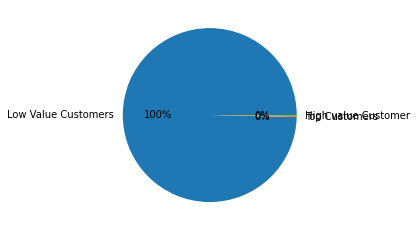

In [ ]:
plt.pie(rfm_df.Customer_segment.value_counts(),
labels=rfm_df.Customer_segment.value_counts().index,
autopct='%.0f%%')
plt.show()

In [ ]:
rfm_df.head(10)

,customer_unique_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,000de6019bb59f34c099a907c151d855,376,1,257.44,21.38,49.82,49.82,2.28,Low Value Customers
1,000e309254ab1fc5ba99dd469d36bdb4,65,1,8.53,85.81,49.82,49.82,2.76,Low Value Customers
2,000ed48ceeb6f4bf8ad021a10a3c7b43,100,1,20.75,79.34,49.82,49.82,2.71,Low Value Customers
3,0011c98589159d6149979563c504cb21,389,1,117.94,19.51,49.82,49.82,2.26,Low Value Customers
4,0015752e079902b12cd00b9b7596276b,26,1,74.82,94.11,49.82,49.82,2.82,Low Value Customers
5,002471155ecd08d208d1376720e2a907,20,1,92.18,96.01,49.82,49.82,2.84,Low Value Customers
6,002d71b244beb91ca7030b15ab526446,463,1,130.56,10.40,49.82,49.82,2.20,Low Value Customers
7,002eb8b96288f3804e21d2777ac29895,403,1,137.99,17.61,49.82,49.82,2.25,Low Value Customers
8,0032c76b20340da25249092a268ce66c,692,1,144.94,0.12,49.82,49.82,2.12,Low Value Customers
9,004288347e5e88a27ded2bb23747066c,398,1,251.09,18.28,49.82,49.82,2.25,Low Value Customers


In [ ]:
rfm_df.to_excel(path+'data_olist_RFM.xlsx', index=False )

## 7. Exploratory Data Analysis & Visualization

In [ ]:
df['freight_value']

0        16.11
1        17.33
2        12.03
3        15.56
4        15.56
         ...  
10996    11.85
10997    23.63
10998    19.35
10999    36.98
11000    40.59
Name: freight_value, Length: 11001, dtype: float64

In [ ]:
cust_city = list(df['customer_city'].unique())
len(cust_city)

1663

(0.0, 10.0)

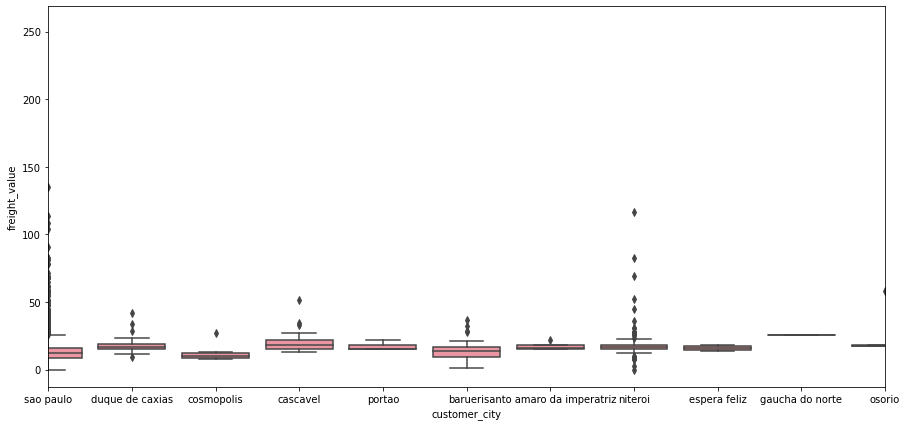

In [ ]:
# Memvisualisasikan persebaran data di kolom customer city dengan boxplot
plt.figure(figsize=(15,7))
gfg = sns.boxplot(x = "customer_city", y = "freight_value", data = df)
gfg.set_xlim(0, 10)

In [ ]:
data_freight = df[['customer_city','freight_value']]
y = df[data_freight['customer_city'] == 'sao paulo']
y.to_csv(path+'saopaulo.csv', index=False)

Pengujian Hipotesis

Hipotesis Null :  μ1−μ2=0 , Freight value Sao Paulo sama dengan Freight Value kota lainnya

Hipotesis Alternative :  μ1−μ2!=0 , Freight value Sao Paulo memiliki perbedaan dengan Freight Value kota lainnya

In [ ]:
# Mencari perbedaan harga freight value antara kota Sao Paulo dengan tiap customer city lainnya
list_data= range(1,1600)
alpha=0.05
tolakHo=0
terimaHo=0
group1 = df[df['customer_city'] == cust_city[0]]["freight_value"]

for i in list_data:
    group2 = df[df['customer_city'] == cust_city[i]]["freight_value"]
    stat, p = ttest_ind(group1, group2)
    print('=======================================================================')
    print('Hipotesis dari ' + str(cust_city[0] + ' dan ' + str(cust_city[i])))
    print('t=%.3f, p=%.3f' % (stat, p))

    # interpret via p-value
    if p < alpha:
      tolakHo=tolakHo+1
      print('Tolak H0, maka harga customer_city {} tidak sama dengan {}.'.format(cust_city[0], cust_city[i]))
    else:
      terimaHo=terimaHo+1
      print('Gagal Tolak H0, maka harga customer_city {} sama dengan {}.'.format(cust_city[0], cust_city[i]))
print("\n")
print("Jumlah tolak Ho = ",tolakHo)
print("Jumlah terima Ho =   ",terimaHo)

Hipotesis dari sao paulo dan duque de caxias
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan duque de caxias.
Hipotesis dari sao paulo dan cosmopolis
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan cosmopolis.
Hipotesis dari sao paulo dan cascavel
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan cascavel.
Hipotesis dari sao paulo dan portao
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan portao.
Hipotesis dari sao paulo dan barueri
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan barueri.
Hipotesis dari sao paulo dan santo amaro da imperatriz
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan santo amaro da imperatriz.
Hipotesis dari sao paulo dan niteroi
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan niteroi.
Hipotesis dari sao paulo dan espera feliz
t=nan, p=nan
Gagal Tolak H0, maka harga custom

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Streaming output truncated to the last 5000 lines.
Hipotesis dari sao paulo dan jacarei
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan jacarei.
Hipotesis dari sao paulo dan vargem bonita
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan vargem bonita.
Hipotesis dari sao paulo dan alem paraiba
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan alem paraiba.
Hipotesis dari sao paulo dan barra do garcas
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan barra do garcas.
Hipotesis dari sao paulo dan joanopolis
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan joanopolis.
Hipotesis dari sao paulo dan tailandia
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan tailandia.
Hipotesis dari sao paulo dan americana
t=nan, p=nan
Gagal Tolak H0, maka harga customer_city sao paulo sama dengan americana.
Hipotesis dari sao paulo dan teodoro sampai

Dari hasil pengujian hipotesis, bahwa tidak ada perbedaan harga Freight value antara kota Sao Paulo dengan kota lainnya.

## 8. Rekomendasi

1.   Mengembangkan strategi baru untuk menurunkan biaya pengiriman bagi pelanggan.
2.   (1) Memperbaiki situasi keterlambatan dan kepuasan pelanggan, (2) Juga kontrol waktu pengiriman dapat ditingkatkan dengan memiliki pusat logistik olist.
3.   Olist dapat meningkatkan penjualannya dengan fokus pada kategori Kebutuhan Rumah Tangga dan Fashion



## 9. Kesimpulan - Create the story

1.   Ada indikasi bahwa biaya pengiriman yang tinggi menyebabkan gap dari total transaksi antara Sao Paulo dengan negara bagian lain sangat tinggi.
2.   Data menunjukkan waktu pengiriman yang dapat diterima untuk pelanggan dengan melihat skor ulasan.
3.   Diagram Pareto menunjukkan beberapa penjualan kategori produk penting untuk Olist